## **Aim:** Exploratory Data Analysis on Terrorism (To find out hot zone of Terrorism)


<br>

> #### **By:** Siddharth Kulkarni
> #### **Tool used:** Tableau
> #### **Language used:** Python
> #### **Dataset:** https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view (Terrorism Data)

## Loading Libraries & Importing Dataset

In [1]:
! pip install openpyxl
import pandas as pd
import missingno as msno
%matplotlib inline

     |████████████████████████████████| 242 kB 295 kB/s 


In [2]:
data = pd.read_csv("../input/global-terrorism/global_terrorism.csv",encoding='ISO-8859-1')
data.tail()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


## Selecting only the necessary features

In [3]:
#print(list(data.columns))
data = data[['iyear','imonth','iday','country_txt','region_txt','provstate','location','extended','success','suicide','attacktype1_txt','targtype1_txt',
             'targsubtype1_txt','target1','nkill','nwound','weaptype1_txt','motive','summary','gname','city','latitude','longitude']]

## Renaming the feature names for better understaning

In [4]:
data.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','provstate':'state',
                     'attacktype1_txt':'attack_type','targtype1_txt':'target_type','targsubtype1_txt':'target_subtype','target1':'target',
                     'nkill':'killed','nwound':'wounded','weaptype1_txt':'weapon_type','gname':'group'},inplace=True)

In [5]:
data.head()

,year,month,day,country,region,state,location,extended,success,suicide,...,target,killed,wounded,weapon_type,motive,summary,group,city,latitude,longitude
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,NaN,0,1,0,...,Julio Guzman,1.0,0.0,Unknown,NaN,NaN,MANO-D,Santo Domingo,18.456792,-69.951164
1,1970,0,0,Mexico,North America,Federal,NaN,0,1,0,...,"Nadine Chaval, daughter",0.0,0.0,Unknown,NaN,NaN,23rd of September Communist League,Mexico city,19.371887,-99.086624
2,1970,1,0,Philippines,Southeast Asia,Tarlac,NaN,0,1,0,...,Employee,1.0,0.0,Unknown,NaN,NaN,Unknown,Unknown,15.478598,120.599741
3,1970,1,0,Greece,Western Europe,Attica,NaN,0,1,0,...,U.S. Embassy,NaN,NaN,Explosives,NaN,NaN,Unknown,Athens,37.997490,23.762728
4,1970,1,0,Japan,East Asia,Fukouka,NaN,0,1,0,...,U.S. Consulate,NaN,NaN,Incendiary,NaN,NaN,Unknown,Fukouka,33.580412,130.396361


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            181691 non-null  int64  
 1   month           181691 non-null  int64  
 2   day             181691 non-null  int64  
 3   country         181691 non-null  object 
 4   region          181691 non-null  object 
 5   state           181270 non-null  object 
 6   location        55495 non-null   object 
 7   extended        181691 non-null  int64  
 8   success         181691 non-null  int64  
 9   suicide         181691 non-null  int64  
 10  attack_type     181691 non-null  object 
 11  target_type     181691 non-null  object 
 12  target_subtype  171318 non-null  object 
 13  target          181055 non-null  object 
 14  killed          171378 non-null  float64
 15  wounded         165380 non-null  float64
 16  weapon_type     181691 non-null  object 
 17  motive    

## Checking for missing values 

In [7]:
data.isna().sum()

year                   0
month                  0
day                    0
country                0
region                 0
state                421
location          126196
extended               0
success                0
suicide                0
attack_type            0
target_type            0
target_subtype     10373
target               636
killed             10313
wounded            16311
weapon_type            0
motive            131130
summary            66129
group                  0
city                 434
latitude            4556
longitude           4557
dtype: int64

<AxesSubplot:>

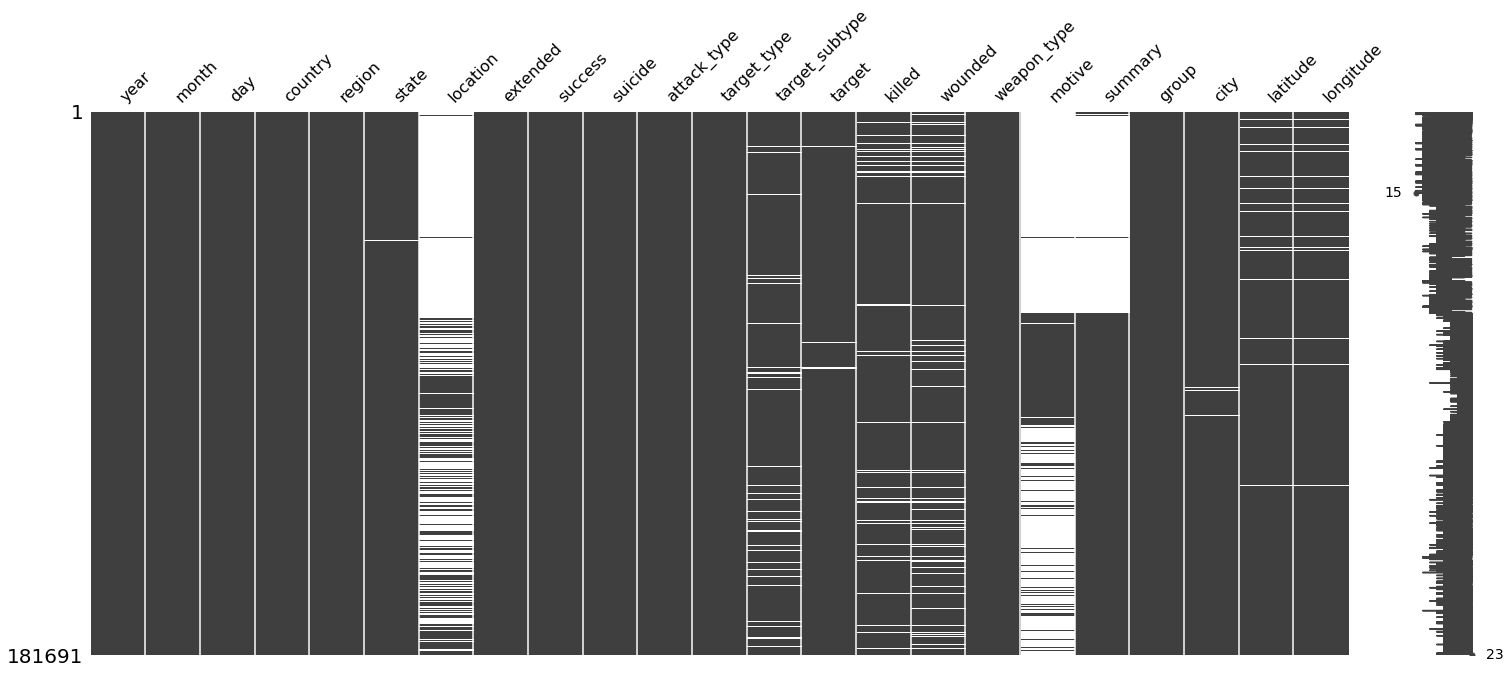

In [8]:
msno.matrix(data)

> #### Summary have more than 35% of missing data whereas Location, Motive have more than 70% of missing data.

In [9]:
data.to_excel('terrorism_data.xlsx',index=False)

## Exploratory Data Analysis Using Tableau


> #### Link: https://public.tableau.com/app/profile/siddharth.kulkarni2558/viz/TerrorismDataAnalysis_16364770272310/Story


In [10]:
%%HTML
<div class='tableauPlaceholder' id='viz1637332955517' style='position: relative'>
    <noscript>
        <a href='#'>
        <img alt='Story ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismDataAnalysis_16364770272310&#47;Story&#47;1_rss.png' style='border: none' />
        </a>
    </noscript>
    <object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='TerrorismDataAnalysis_16364770272310&#47;Story' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismDataAnalysis_16364770272310&#47;Story&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' />
    </object>
</div>
<script type='text/javascript'>  
    var divElement = document.getElementById('viz1637332955517');                    
    var vizElement = divElement.getElementsByTagName('object')[0];                    
    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    
    var scriptElement = document.createElement('script');                    
    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
    vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

## Conclusion


> #### Used Tableau and Analysed the Terrorism Data